In [1]:
from pycisTopic.clust_vis import (
    find_clusters,
    run_umap,
    run_tsne,
    plot_metadata,
    plot_topic,
)
import os
import glob
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display
import math

%load_ext lab_black

In [2]:
samples = [
    x.split("/")[-1].split("__")[0]
    for x in sorted(glob.glob("cistopic_objects/*singlets*model*topics.pkl"))
]
if len(samples) > len(set(samples)):
    print("samples are not unique!")
else:
    print("samples are unique.")

samples are unique.


In [3]:
cto_model_path_dict = {
    x.split("/")[-1].split("__")[0]: x
    for x in sorted(glob.glob("cistopic_objects/*singlets*topics.pkl"))
}
cto_model_path_dict

{'10xmultiome_celltypefair_1.FIXEDCELLS': 'cistopic_objects/10xmultiome_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_19topics.pkl',
 '10xv11_celltypefair_1.FIXEDCELLS': 'cistopic_objects/10xv11_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_26topics.pkl',
 '10xv1_celltypefair_1.FIXEDCELLS': 'cistopic_objects/10xv1_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_21topics.pkl',
 '10xv2_celltypefair_1.FIXEDCELLS': 'cistopic_objects/10xv2_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_25topics.pkl',
 'ddseq_celltypefair_1.FIXEDCELLS': 'cistopic_objects/ddseq_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_17topics.pkl',
 'hydrop_celltypefair_1.FIXEDCELLS': 'cistopic_objects/hydrop_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_22topics.pkl',
 'mtscatac_celltypefair_1.FIXEDCELLS': 'cistopic_objects/mtscatac_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_25topics.pkl',
 's3atac_celltypefa

10xmultiome_celltypefair_1.FIXEDCELLS
	cistopic_objects/10xmultiome_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_19topics.dimreduc.pkl exists, skipping


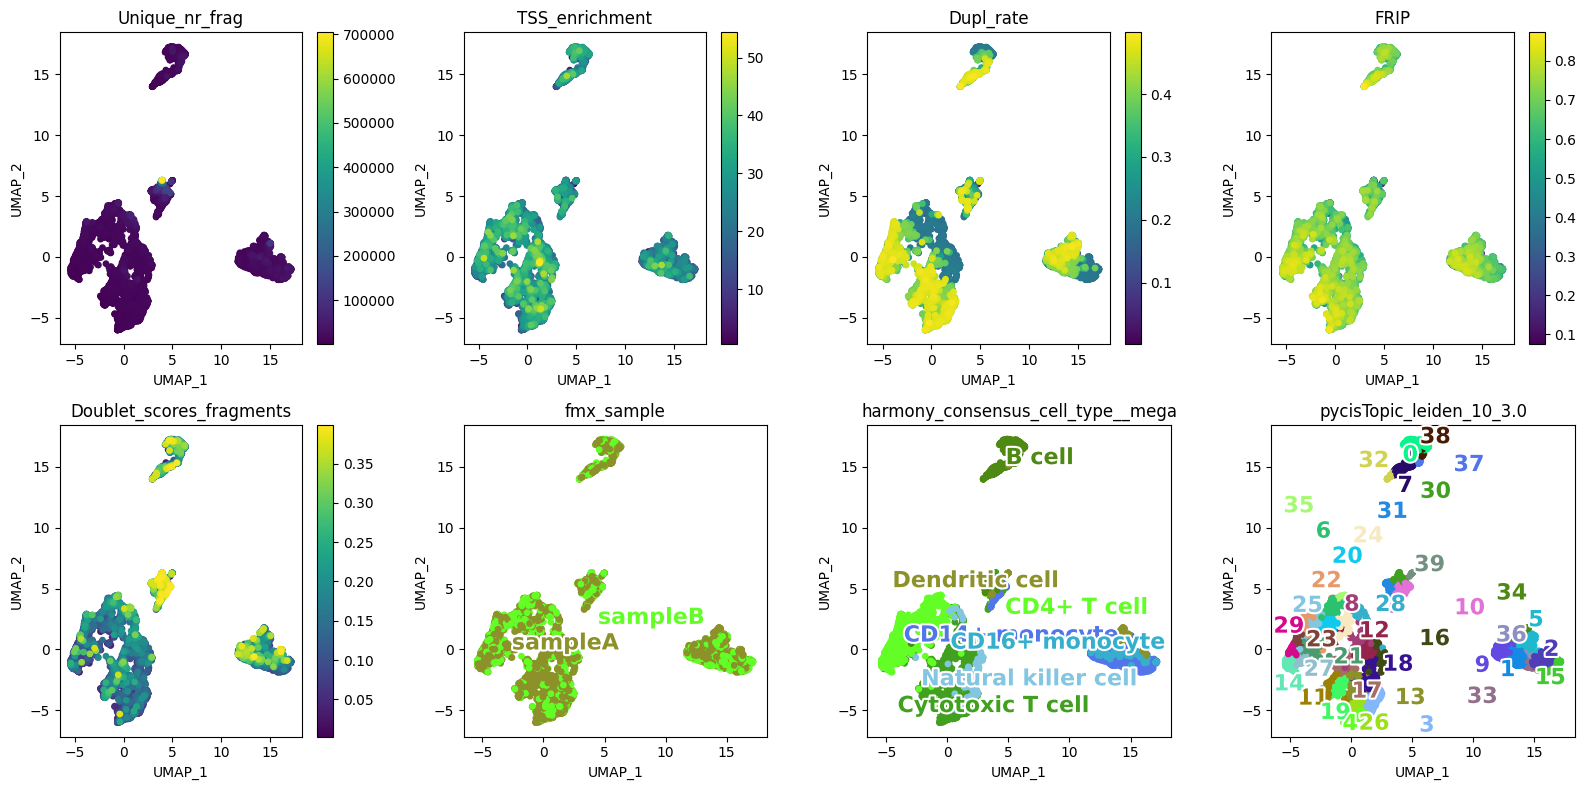

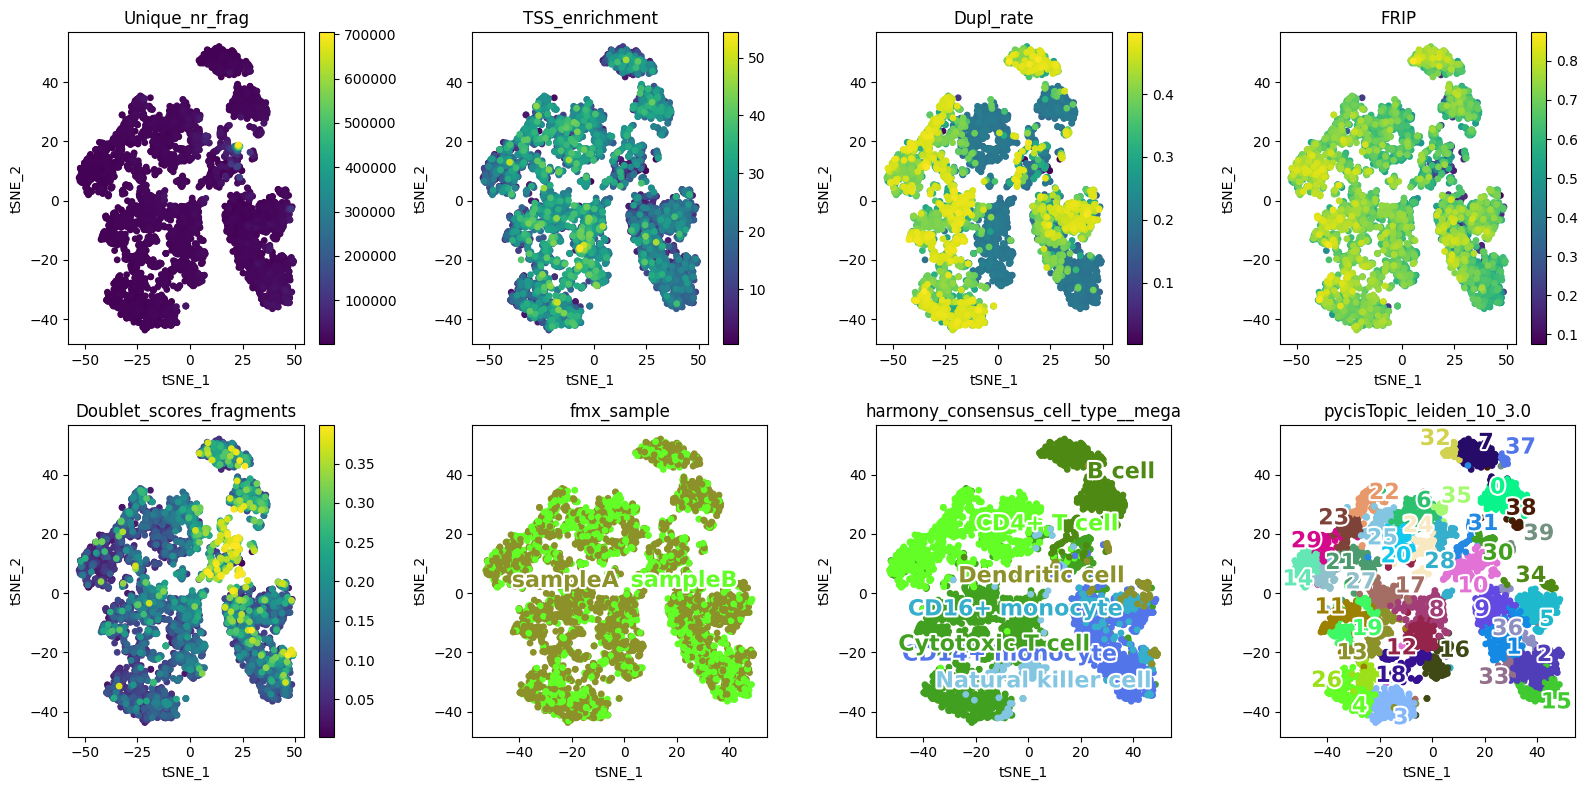

10xv11_celltypefair_1.FIXEDCELLS
	cistopic_objects/10xv11_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_26topics.dimreduc.pkl exists, skipping


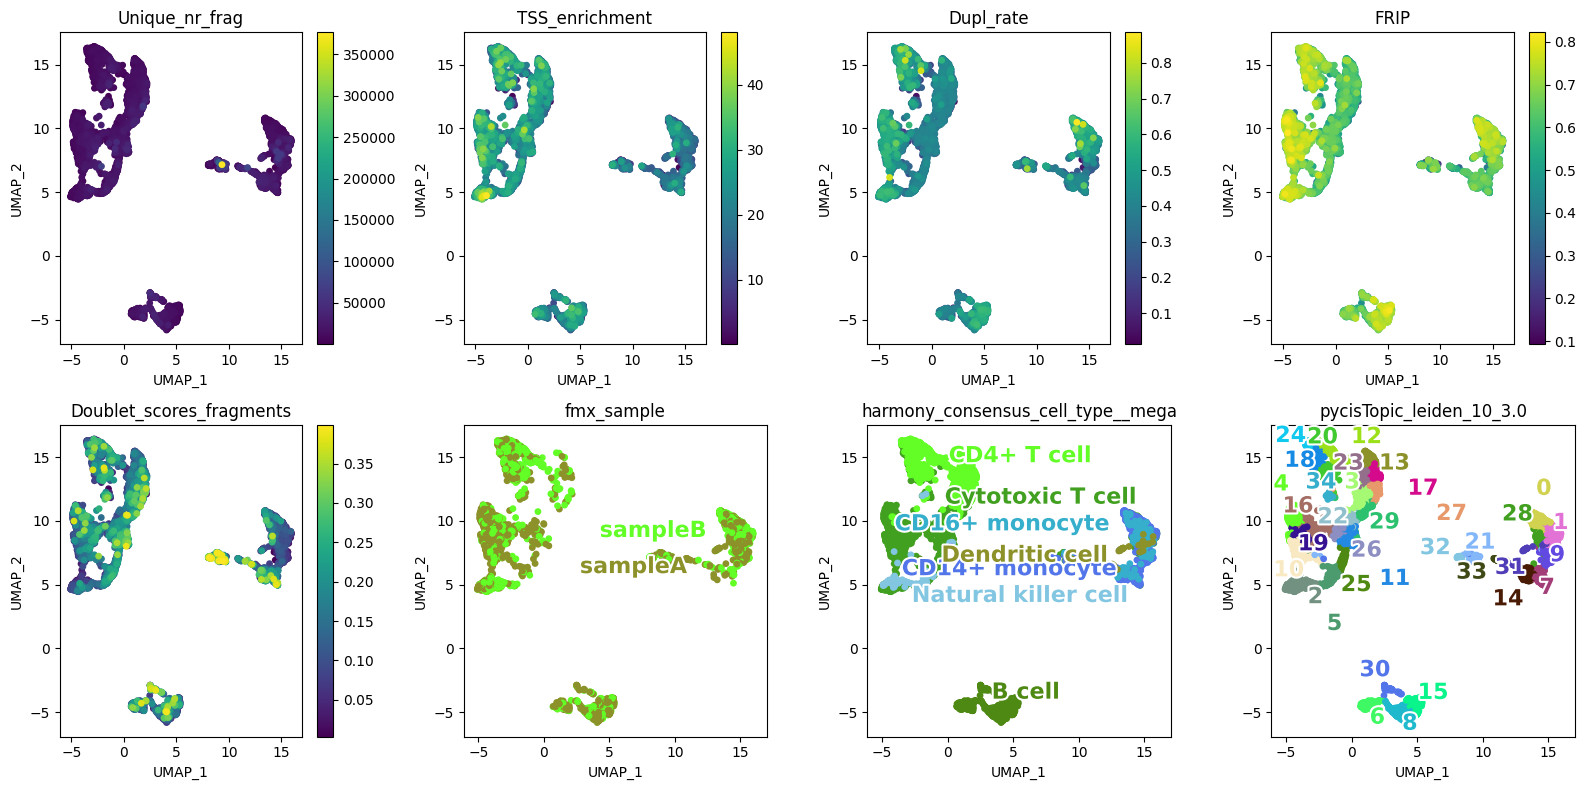

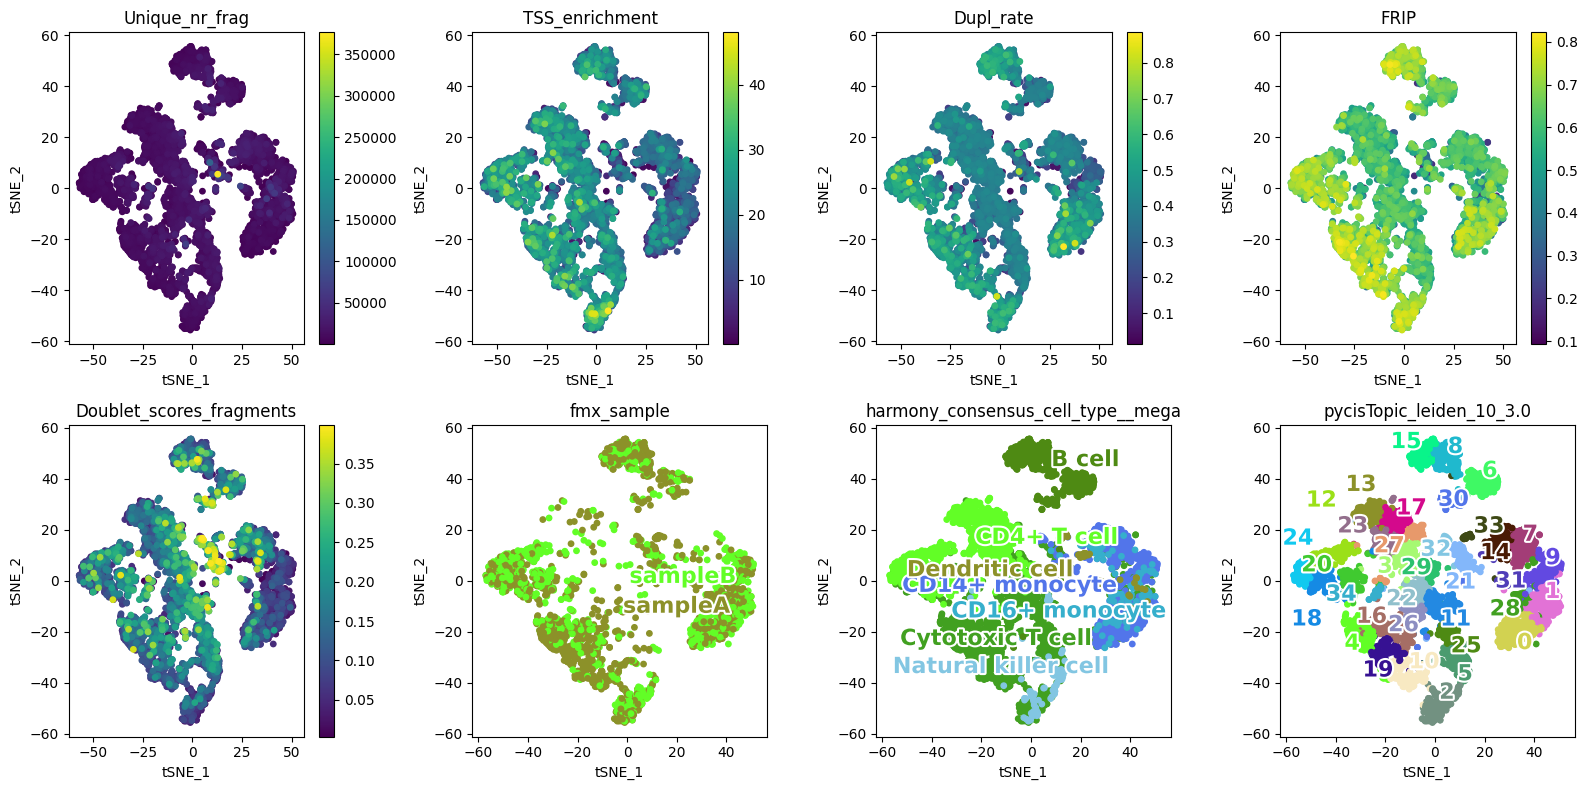

10xv1_celltypefair_1.FIXEDCELLS
	cistopic_objects/10xv1_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_21topics.dimreduc.pkl exists, skipping


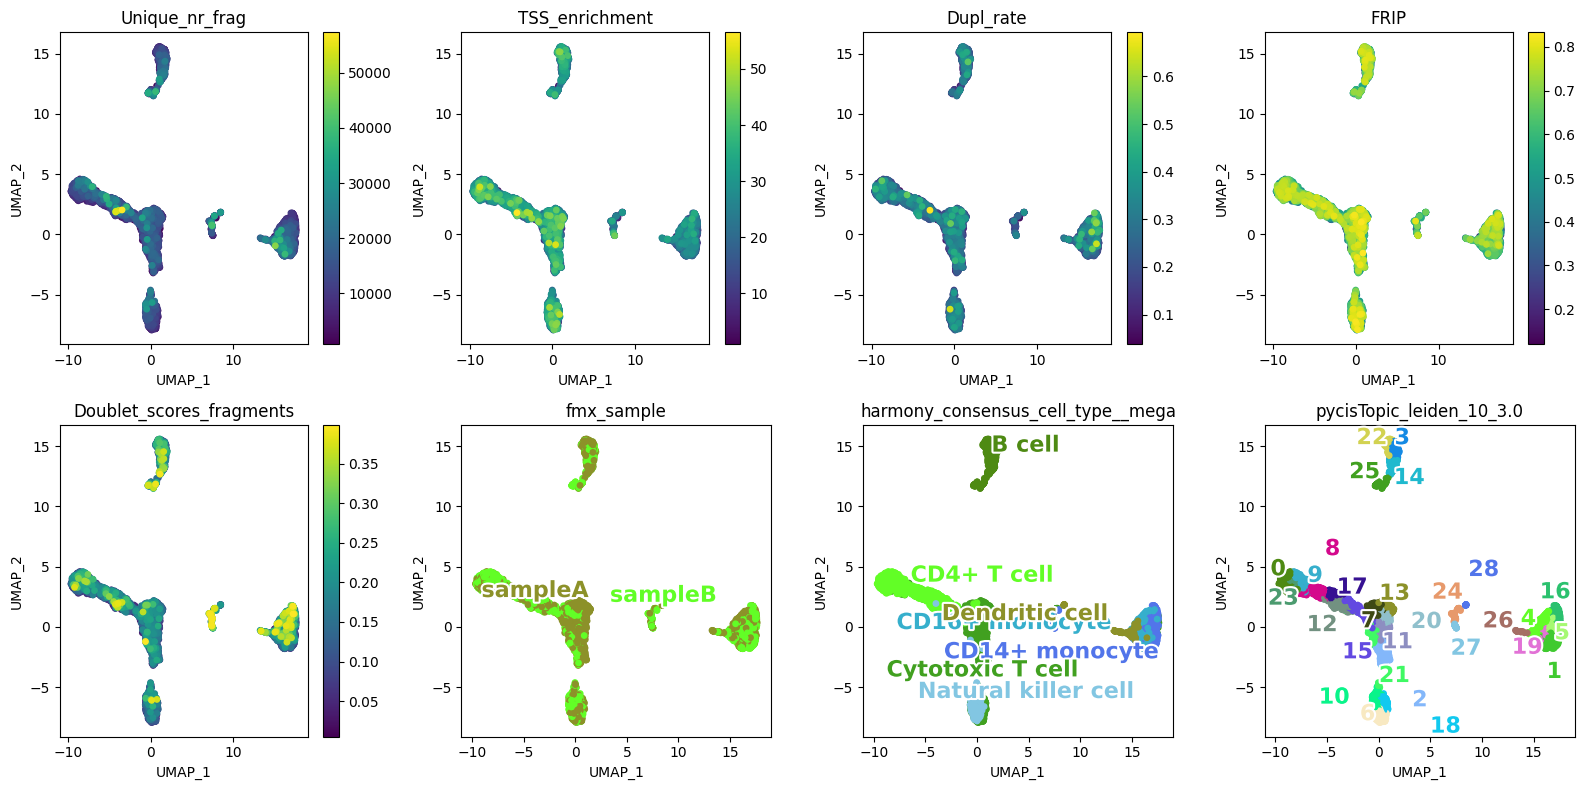

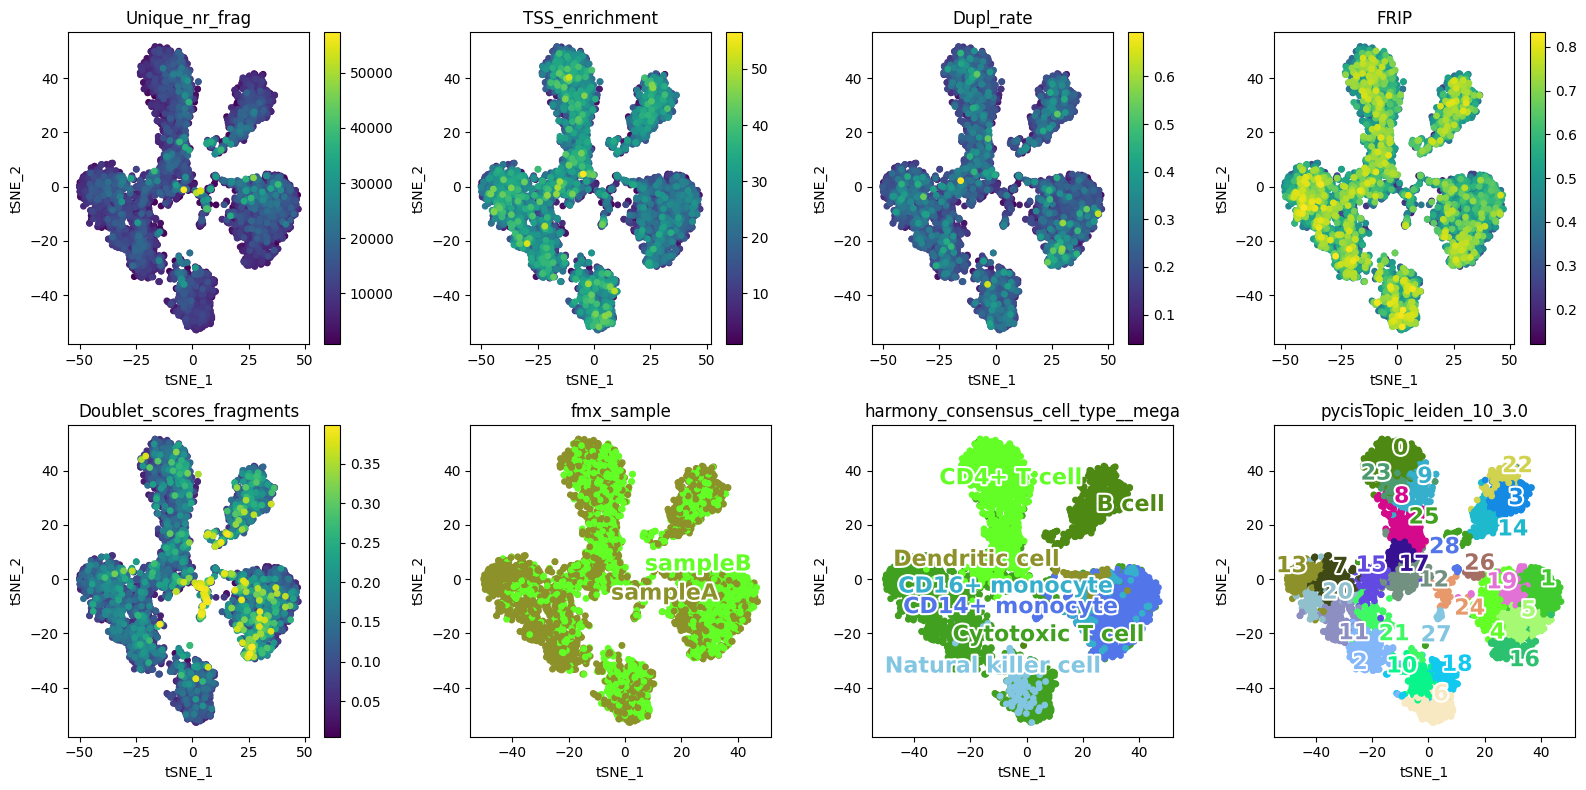

10xv2_celltypefair_1.FIXEDCELLS
	cistopic_objects/10xv2_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_25topics.dimreduc.pkl exists, skipping


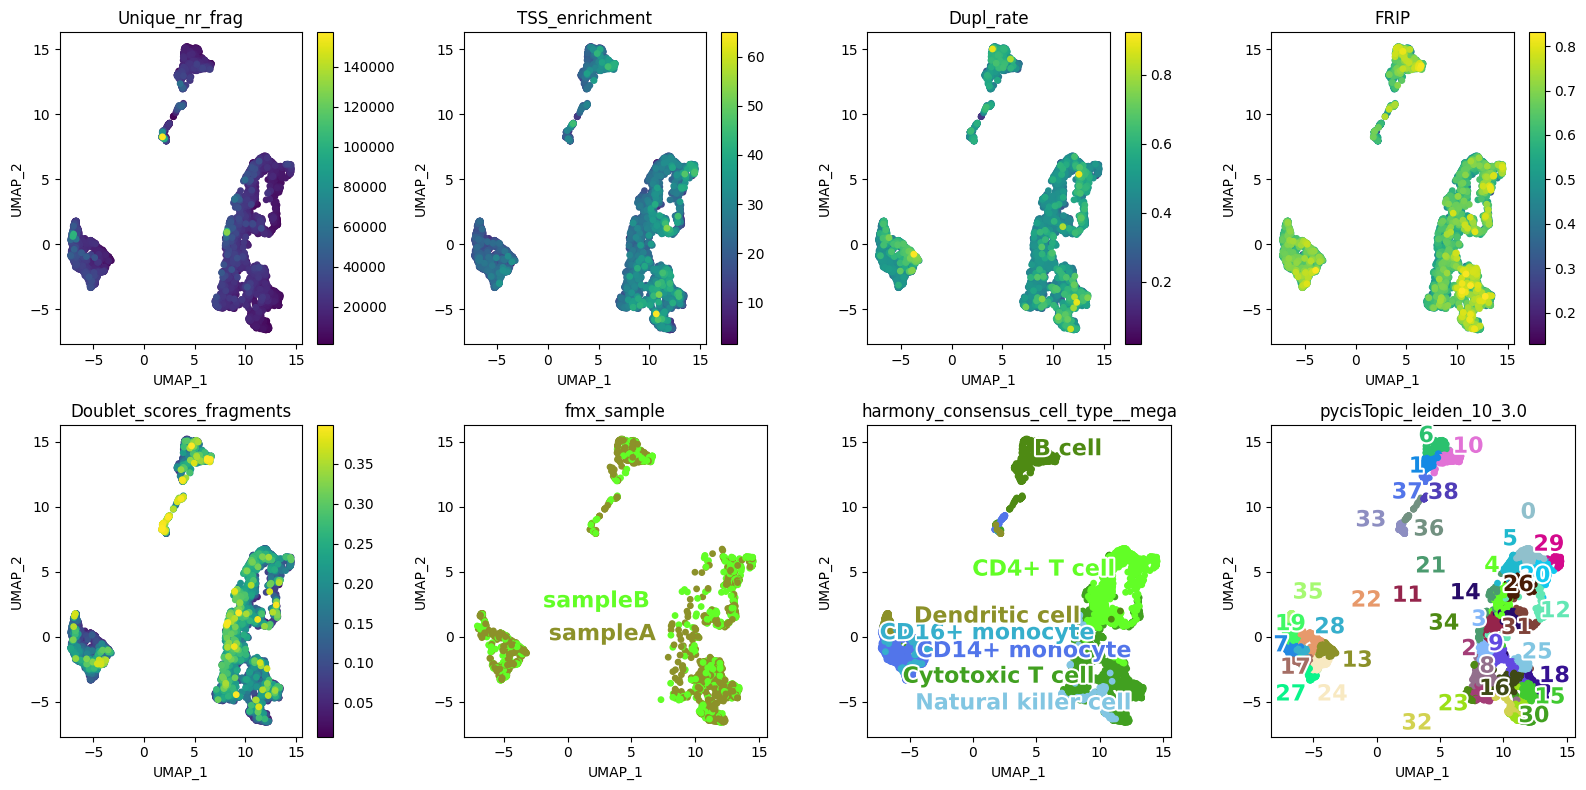

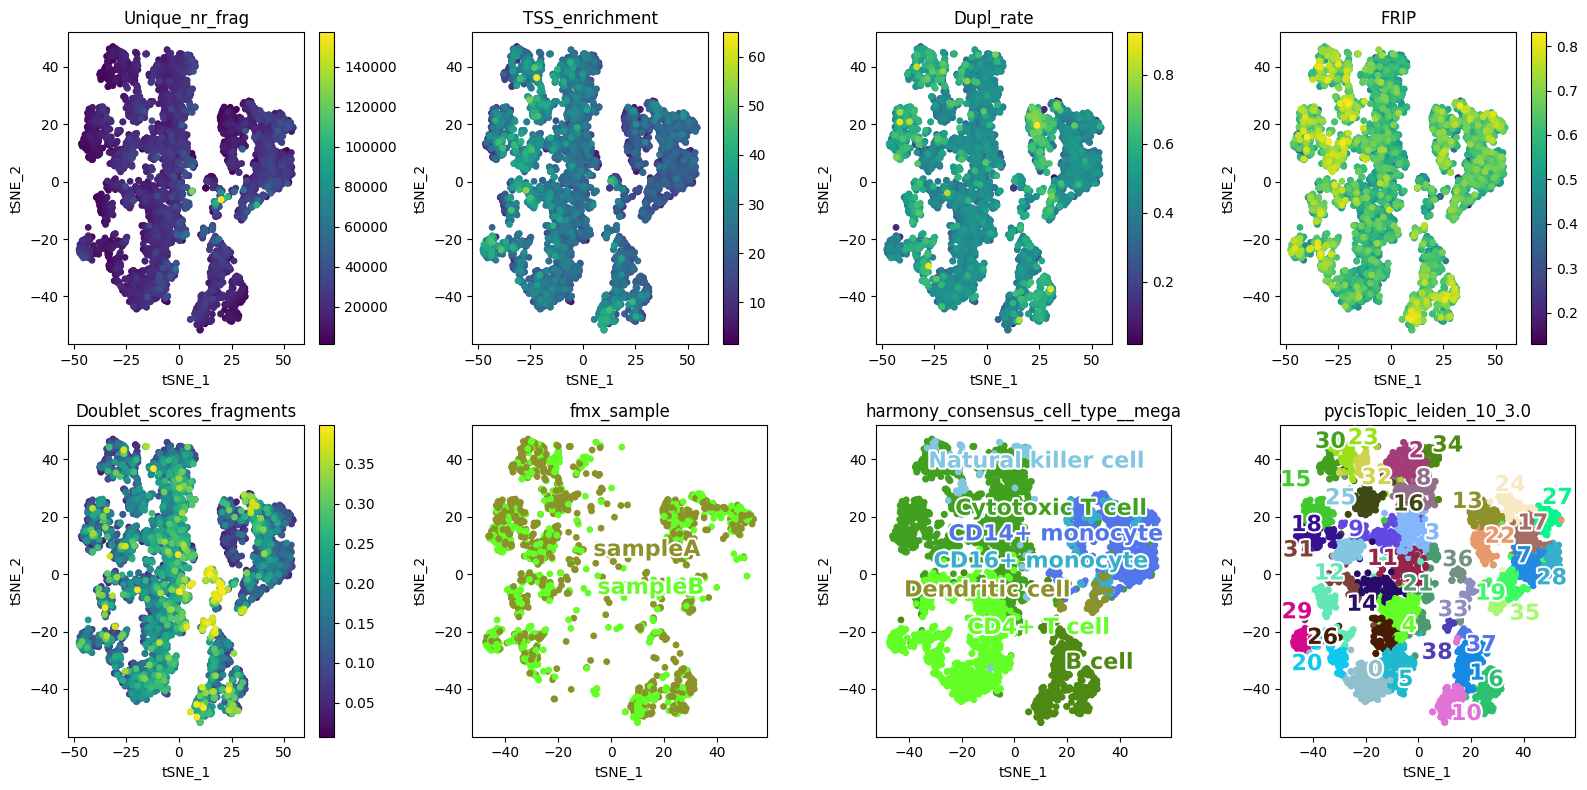

ddseq_celltypefair_1.FIXEDCELLS
	cistopic_objects/ddseq_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_17topics.dimreduc.pkl exists, skipping


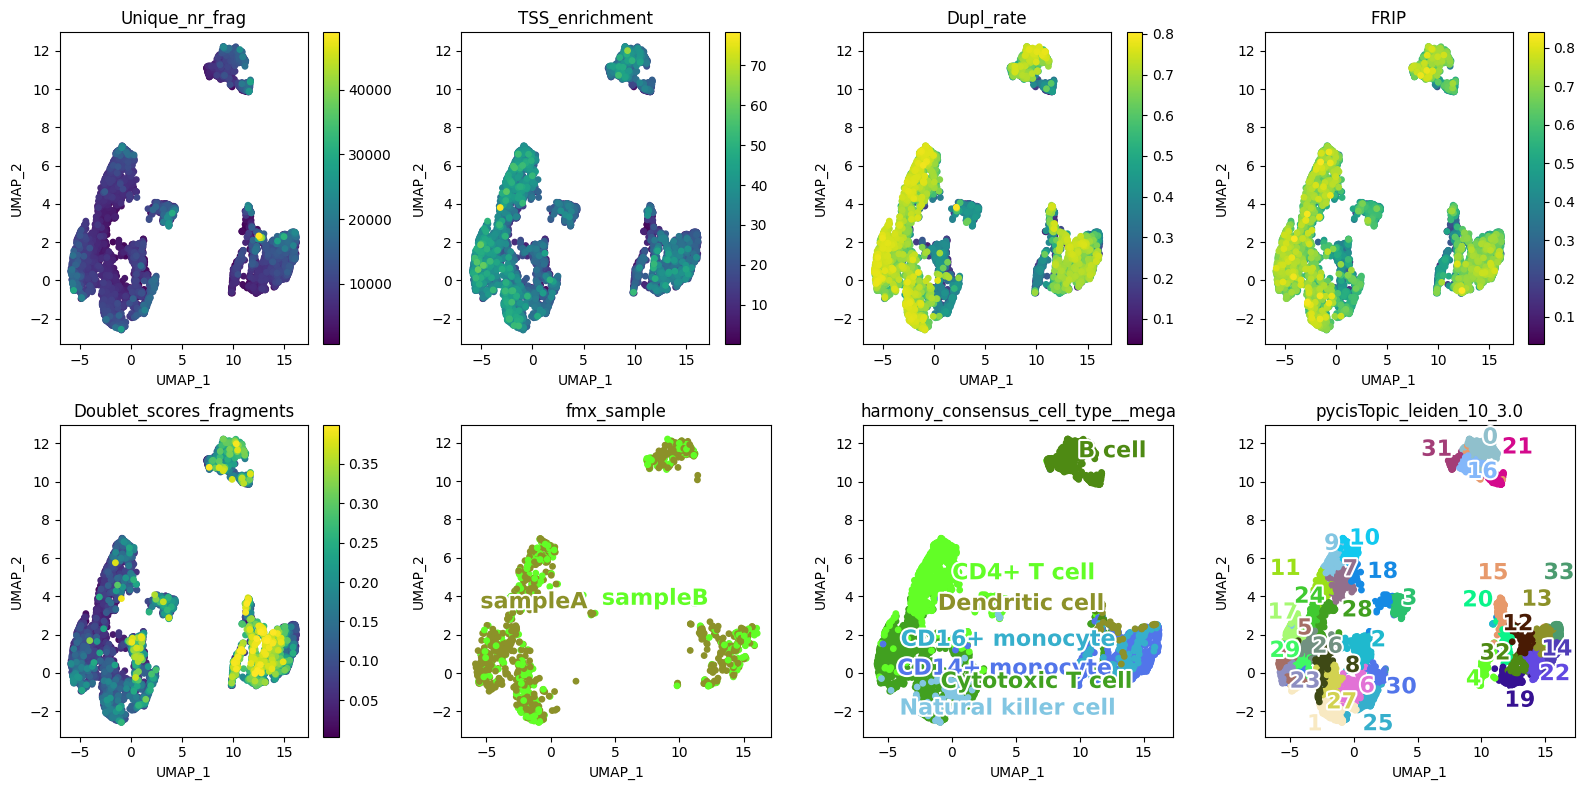

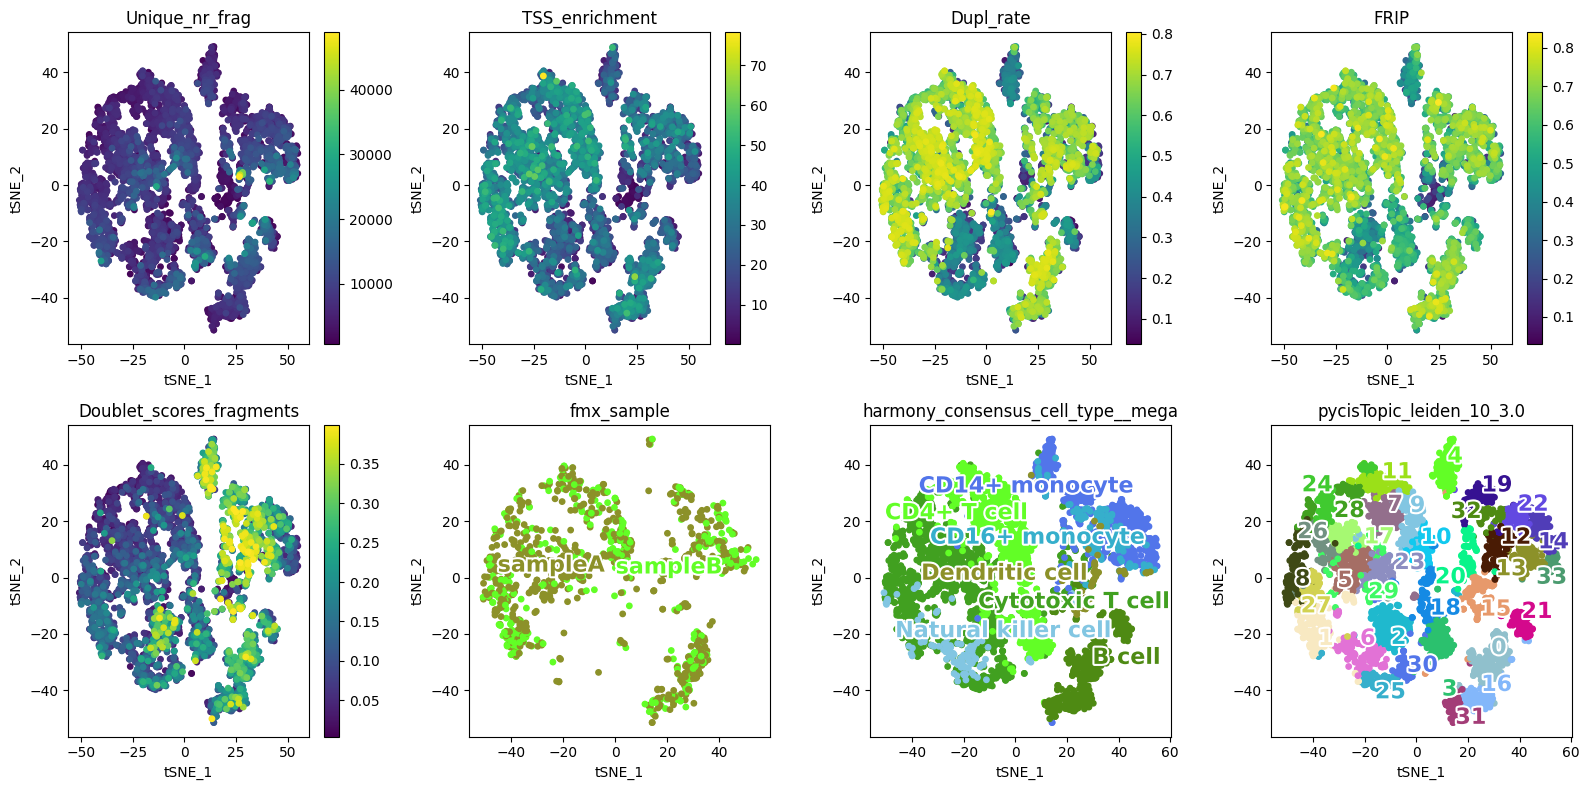

hydrop_celltypefair_1.FIXEDCELLS
	cistopic_objects/hydrop_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_22topics.dimreduc.pkl exists, skipping


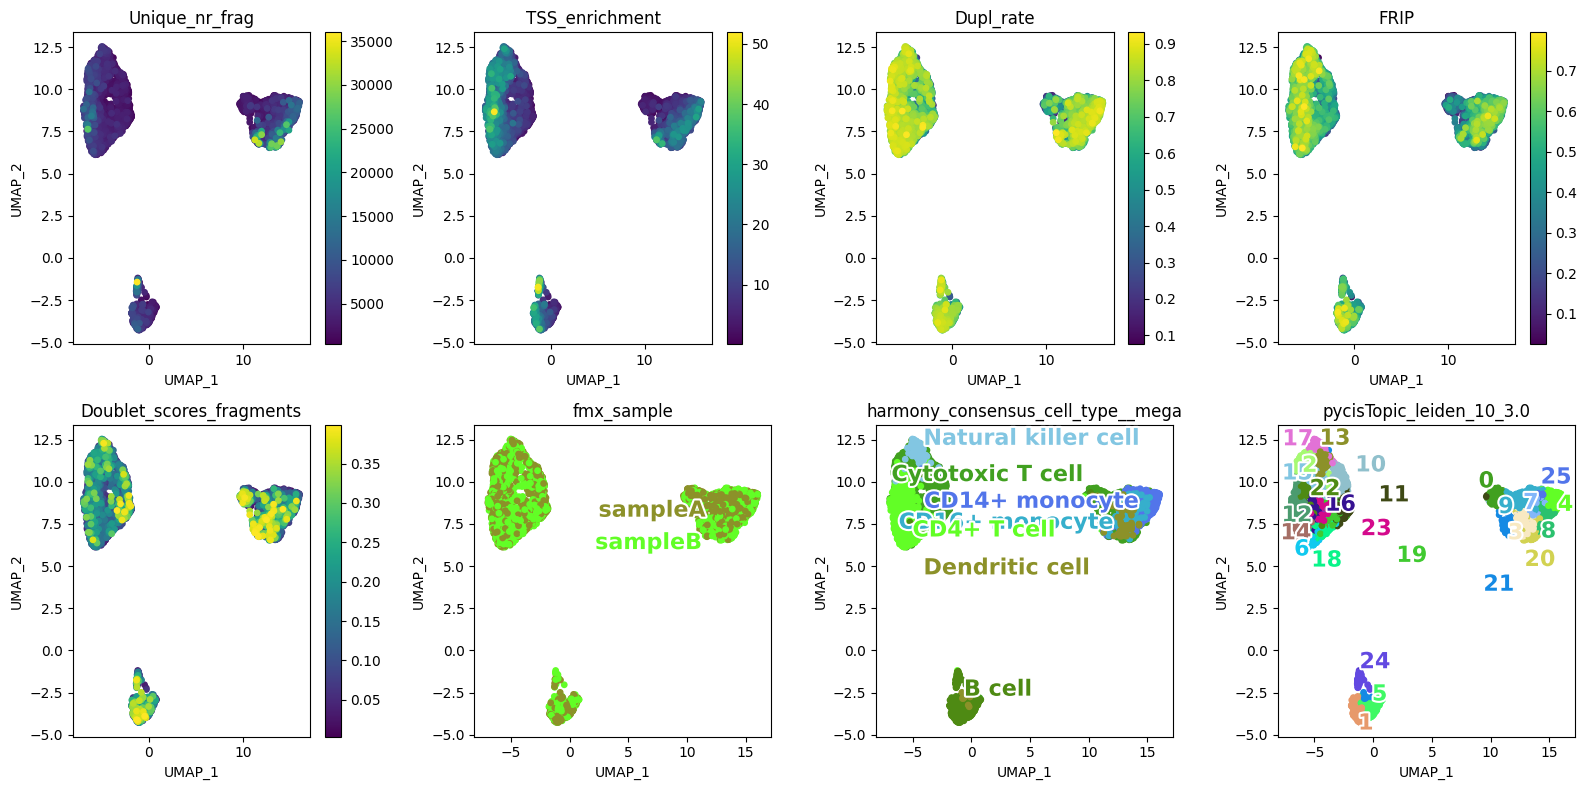

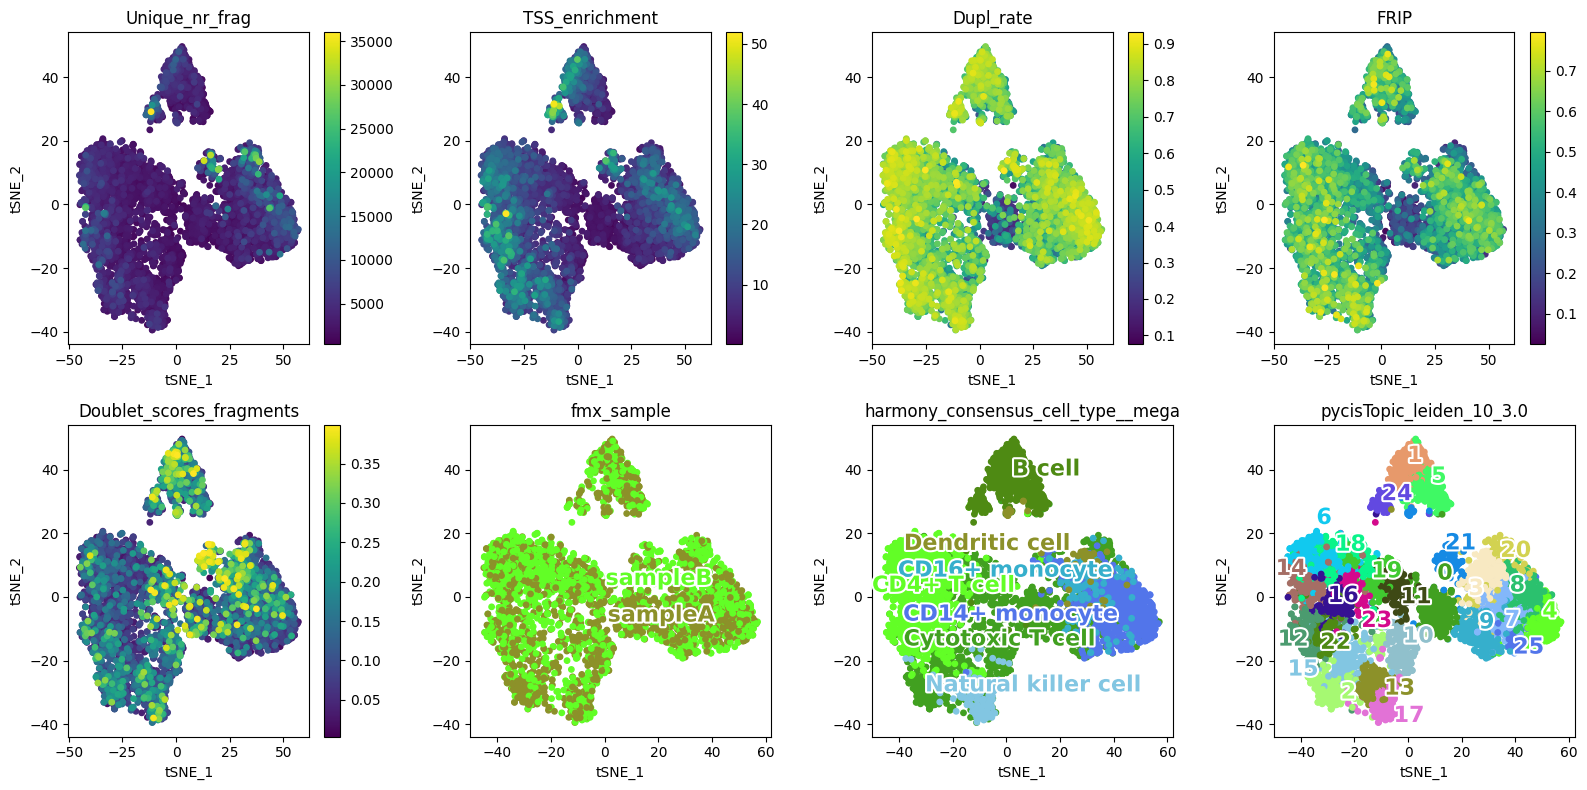

mtscatac_celltypefair_1.FIXEDCELLS
	cistopic_objects/mtscatac_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_25topics.dimreduc.pkl exists, skipping


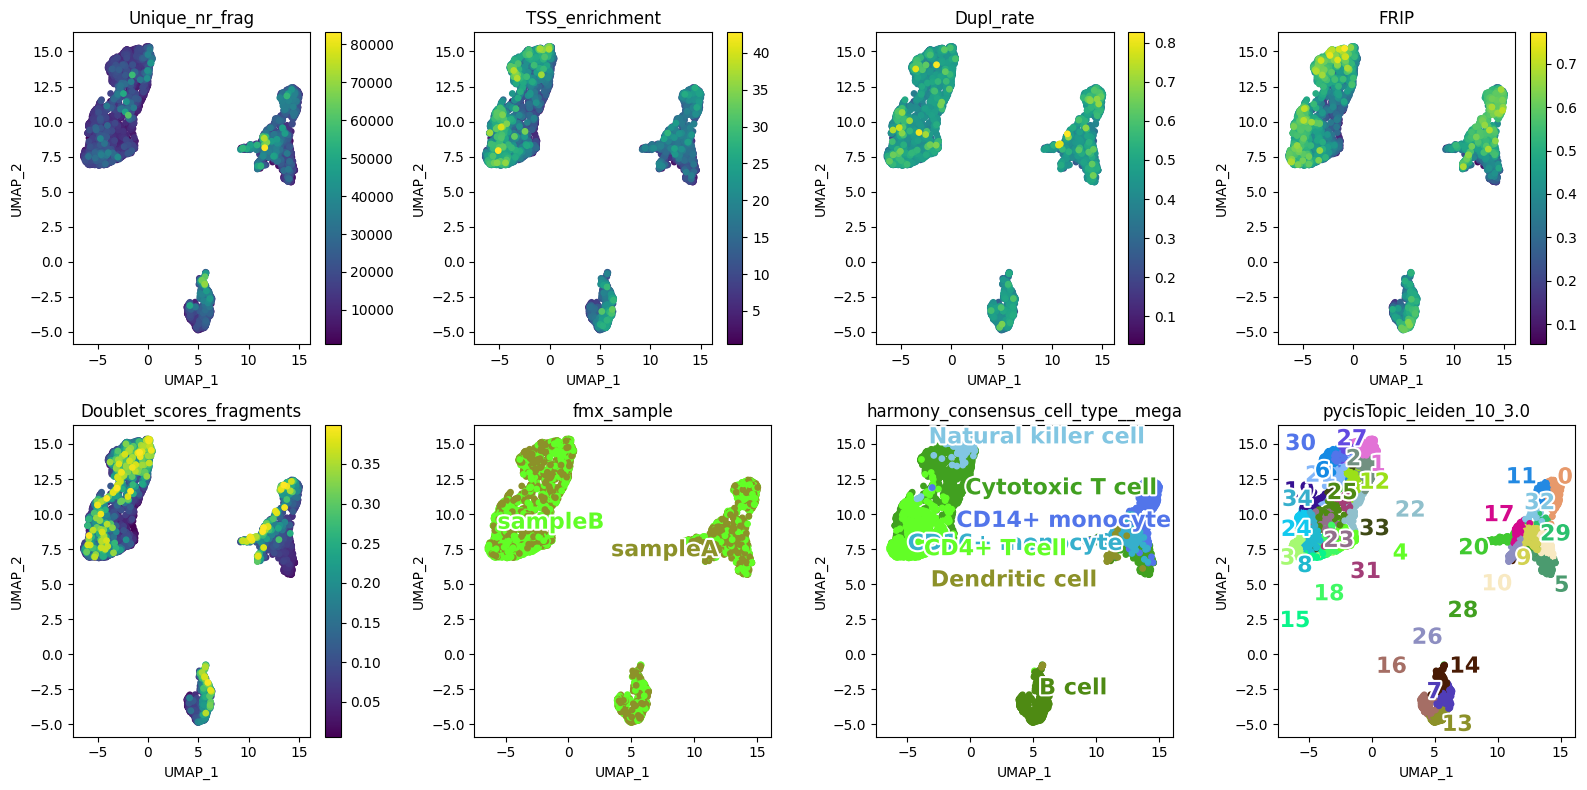

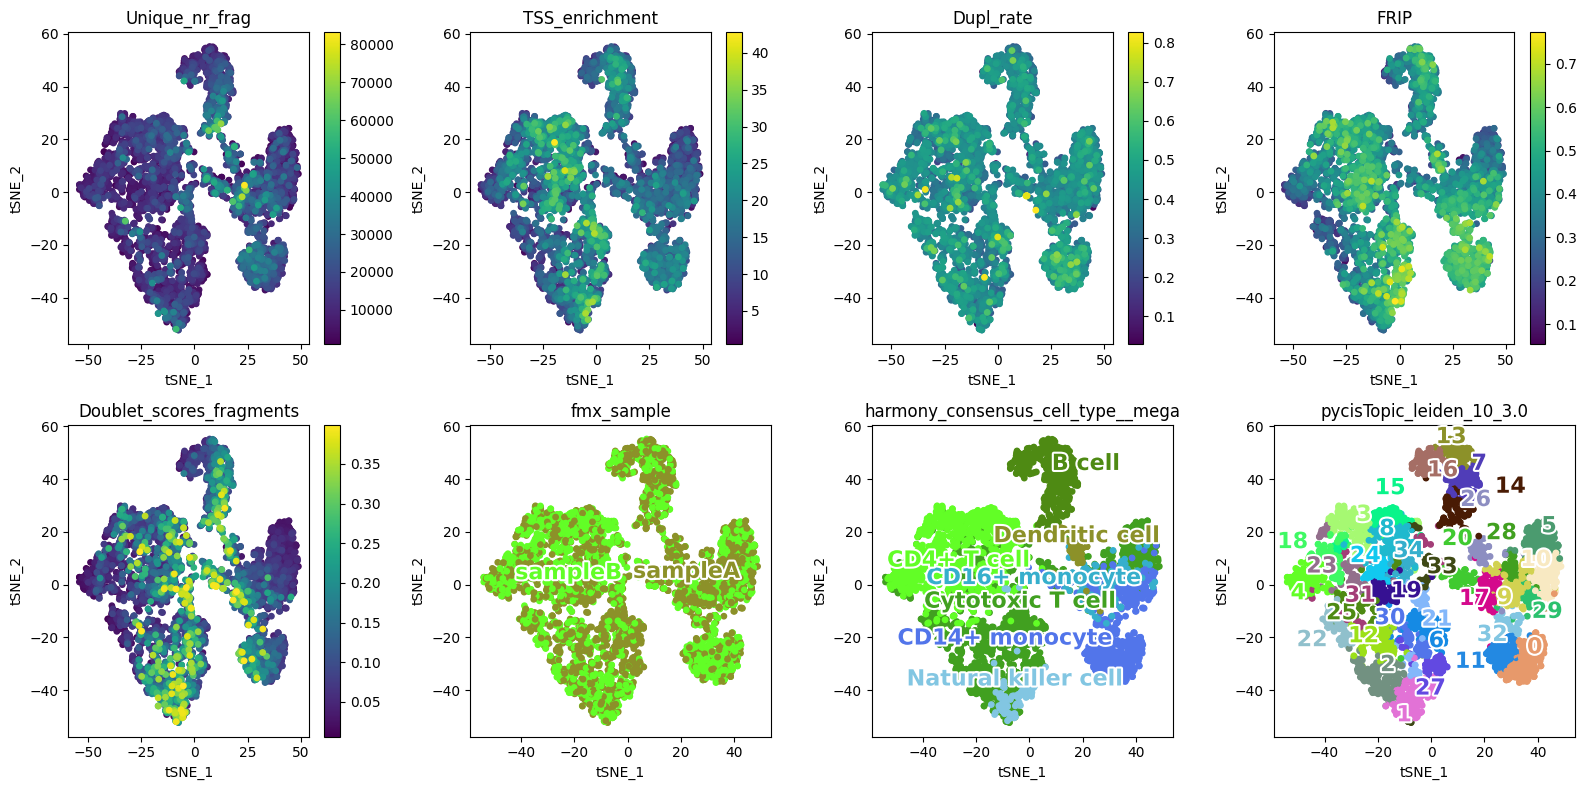

s3atac_celltypefair_1.FIXEDCELLS
	cistopic_objects/s3atac_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_18topics.dimreduc.pkl exists, skipping


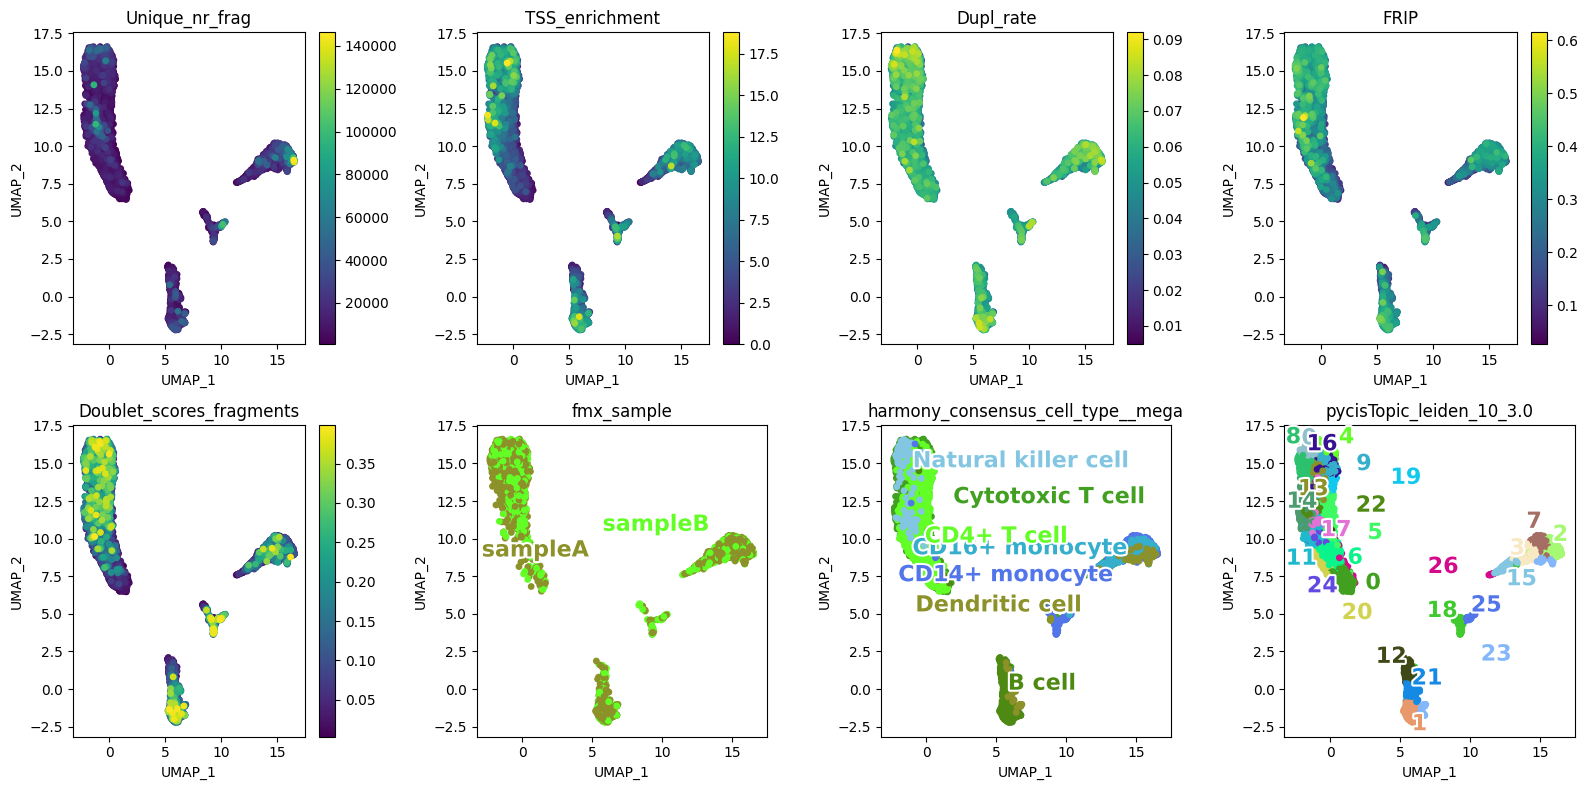

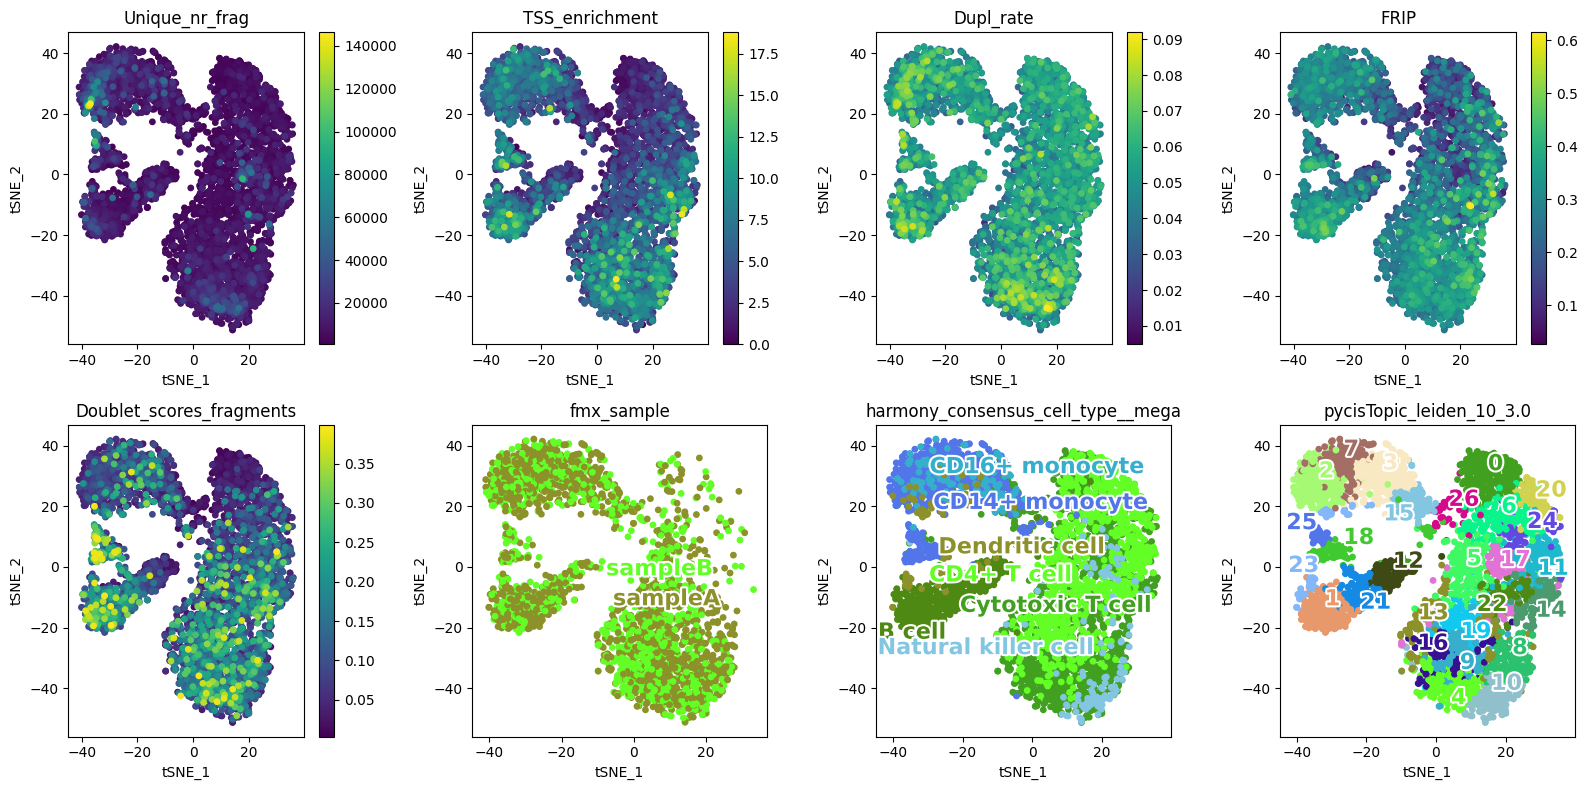

In [4]:
leiden_res = [3.0]
to_plot_leiden = ["pycisTopic_leiden_10_" + str(x) for x in leiden_res]

to_plot_vars = [
    "Unique_nr_frag",
    "TSS_enrichment",
    "Dupl_rate",
    "FRIP",
    "Doublet_scores_fragments",
    "fmx_sample",
    "harmony_consensus_cell_type__mega",
]

for sample in cto_model_path_dict.keys():
    # for sample in ['VIB_hydrop_1.FIXEDCELLS']:
    to_plot = to_plot_vars + to_plot_leiden

    print(sample)
    cto_path = cto_model_path_dict[sample]
    cto_path_new = cto_path.replace(".pkl", ".dimreduc.pkl")

    if not os.path.exists(cto_path_new):
        with open(cto_path, "rb") as f:
            cto = pickle.load(f)

        cto.cell_names = cto.cell_data.index

        cto.projections["cell"] = {}
        find_clusters(cto, target="cell", k=10, res=leiden_res, prefix="pycisTopic_")
        run_umap(cto, target="cell")
        run_tsne(cto, target="cell")

        if not "fmx_sample" in cto.cell_data.columns:
            to_plot.remove("fmx_sample")

        n_to_plot = len(to_plot)
        n_cols = 4
        n_rows = math.ceil(n_to_plot / n_cols)

        plot_metadata(
            cto,
            reduction_name="UMAP",
            variables=to_plot,
            target="cell",
            num_columns=4,
            text_size=16,
            dot_size=15,
            figsize=(n_cols * 4, n_rows * 4),
            save=f"plots_qc/{sample}__umap_summary.png",
        )

        plot_metadata(
            cto,
            reduction_name="tSNE",
            variables=to_plot,
            target="cell",
            num_columns=4,
            text_size=16,
            dot_size=15,
            figsize=(n_cols * 4, n_rows * 4),
            save=f"plots_qc/{sample}__tsne_summary.png",
        )

        with open(cto_path_new, "wb") as f:
            pickle.dump(cto, f, protocol=4)

    else:
        print(f"\t{cto_path_new} exists, skipping")

        umap_path = f"plots_qc/{sample}__umap_summary.png"
        tsne_path = f"plots_qc/{sample}__tsne_summary.png"

        if os.path.exists(umap_path):
            display(Image(umap_path))

        else:
            with open(cto_path_new, "rb") as f:
                cto = pickle.load(f)

            if not "fmx_sample" in cto.cell_data.columns:
                to_plot.remove("fmx_sample")

            n_to_plot = len(to_plot)
            n_cols = 4
            n_rows = math.ceil(n_to_plot / n_cols)

            plot_metadata(
                cto,
                reduction_name="UMAP",
                variables=to_plot,
                target="cell",
                num_columns=4,
                text_size=16,
                dot_size=15,
                figsize=(n_cols * 4, n_rows * 4),
                save=f"plots_qc/{sample}__umap_summary.png",
            )

        if os.path.exists(tsne_path):
            display(Image(tsne_path))

        else:
            with open(cto_path_new, "rb") as f:
                cto = pickle.load(f)

            n_to_plot = len(to_plot)
            n_cols = 4
            n_rows = math.ceil(n_to_plot / n_cols)

            plot_metadata(
                cto,
                reduction_name="tSNE",
                variables=to_plot,
                target="cell",
                num_columns=4,
                text_size=16,
                dot_size=15,
                figsize=(n_cols * 4, n_rows * 4),
                save=f"plots_qc/{sample}__tsne_summary.png",
            )

# plot nicely

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
cto_model_path_dict = {
    x.split("/")[-1].split("__")[0]: x
    for x in sorted(glob.glob("cistopic_objects/*singlets*dimreduc.pkl"))
}
cto_model_path_dict

{'10xmultiome_celltypefair_1.FIXEDCELLS': 'cistopic_objects/10xmultiome_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_19topics.dimreduc.pkl',
 '10xv11_celltypefair_1.FIXEDCELLS': 'cistopic_objects/10xv11_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_26topics.dimreduc.pkl',
 '10xv1_celltypefair_1.FIXEDCELLS': 'cistopic_objects/10xv1_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_21topics.dimreduc.pkl',
 '10xv2_celltypefair_1.FIXEDCELLS': 'cistopic_objects/10xv2_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_25topics.dimreduc.pkl',
 'ddseq_celltypefair_1.FIXEDCELLS': 'cistopic_objects/ddseq_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_17topics.dimreduc.pkl',
 'hydrop_celltypefair_1.FIXEDCELLS': 'cistopic_objects/hydrop_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_22topics.dimreduc.pkl',
 'mtscatac_celltypefair_1.FIXEDCELLS': 'cistopic_objects/mtscatac_celltypefair_1.FIXEDCELLS__cto.scrublet0-4

In [6]:
for sample, path in cto_model_path_dict.items():
    print(sample)
    with open(path, "rb") as f:
        cto = pickle.load(f)

    cto.cell_data["UMAP_1"] = cto.projections["cell"]["UMAP"]["UMAP_1"]
    cto.cell_data["UMAP_2"] = cto.projections["cell"]["UMAP"]["UMAP_2"]
    cto.cell_data["tSNE_1"] = cto.projections["cell"]["tSNE"]["tSNE_1"]
    cto.cell_data["tSNE_2"] = cto.projections["cell"]["tSNE"]["tSNE_2"]

    cto.cell_data.to_csv(path.replace(".pkl", ".cell_data.csv"))

10xmultiome_celltypefair_1.FIXEDCELLS
10xv11_celltypefair_1.FIXEDCELLS
10xv1_celltypefair_1.FIXEDCELLS
10xv2_celltypefair_1.FIXEDCELLS
ddseq_celltypefair_1.FIXEDCELLS
hydrop_celltypefair_1.FIXEDCELLS
mtscatac_celltypefair_1.FIXEDCELLS
s3atac_celltypefair_1.FIXEDCELLS


In [7]:
cell_data_path_dict = {
    x.split("/")[-1].split("__")[0]: x
    for x in sorted(glob.glob("cistopic_objects/*singlets*dimreduc.cell_data.csv"))
}
cell_data_path_dict

{'10xmultiome_celltypefair_1.FIXEDCELLS': 'cistopic_objects/10xmultiome_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_19topics.dimreduc.cell_data.csv',
 '10xv11_celltypefair_1.FIXEDCELLS': 'cistopic_objects/10xv11_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_26topics.dimreduc.cell_data.csv',
 '10xv1_celltypefair_1.FIXEDCELLS': 'cistopic_objects/10xv1_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_21topics.dimreduc.cell_data.csv',
 '10xv2_celltypefair_1.FIXEDCELLS': 'cistopic_objects/10xv2_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_25topics.dimreduc.cell_data.csv',
 'ddseq_celltypefair_1.FIXEDCELLS': 'cistopic_objects/ddseq_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_17topics.dimreduc.cell_data.csv',
 'hydrop_celltypefair_1.FIXEDCELLS': 'cistopic_objects/hydrop_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_22topics.dimreduc.cell_data.csv',
 'mtscatac_celltypefair_1.FIXEDCELLS': 'cistopic

In [45]:
tech_order = [
    "10xv1",
    "10xv11",
    "10xv2",
    "10xmultiome",
    "mtscatac",
    "ddseq",
    "s3atac",
    "hydrop",
]
cell_type_color_dict = {
    "B_cell": "#117733",
    "CD14+_monocyte": "#DDCC77",
    "CD4+_T_cell": "#CC6677",
    "Cytotoxic_T_cell": "#88CCEE",
    "Dendritic_cell": "#44AA99",
    "Natural_killer_cell": "#332288",
    "CD16+_monocyte": "#AA4499",
}
tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv11c": "10x v1.1 (control)",
    "10xv2": "10x v2",
    "ddseq": "Bio-Rad ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "mtscatacfacs": "mtscATAC-seq (FACS)",
    "s3atac": "s3-ATAC",
}
cell_type_alias_dict = {
    "B_cell": "B cells",
    "CD14+_monocyte": "CD14+ monocytes",
    "CD4+_T_cell": "CD4+ T cells",
    "Cytotoxic_T_cell": "CD8+ T cells",
    "Dendritic_cell": "Dendritic cells",
    "Natural_killer_cell": "NK cells",
    "CD16+_monocyte": "CD16+ monocytes",
}

cell_type_order = [
    "B_cell",
    "CD14+_monocyte",
    "CD4+_T_cell",
    "Cytotoxic_T_cell",
    "Dendritic_cell",
    "Natural_killer_cell",
    "CD16+_monocyte",
]

10xmultiome_celltypefair_1.FIXEDCELLS
10xv11_celltypefair_1.FIXEDCELLS
10xv1_celltypefair_1.FIXEDCELLS
10xv2_celltypefair_1.FIXEDCELLS
ddseq_celltypefair_1.FIXEDCELLS
hydrop_celltypefair_1.FIXEDCELLS
mtscatac_celltypefair_1.FIXEDCELLS
s3atac_celltypefair_1.FIXEDCELLS


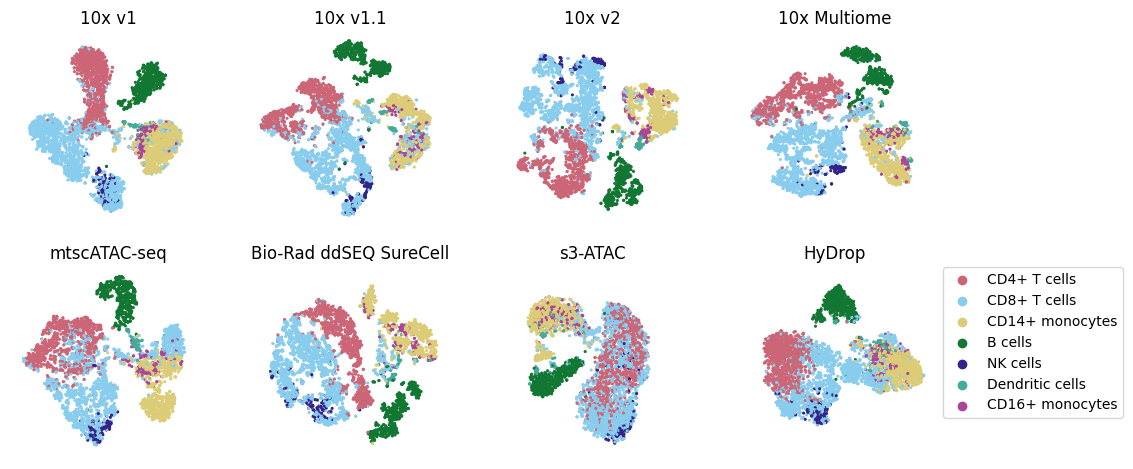

In [35]:
fig, axes = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(10, 5))
fig.tight_layout()
axes = axes.flatten()
for sample, path in cell_data_path_dict.items():
    print(sample)
    tech = sample.split("_")[0]
    df = pd.read_csv(path, index_col=0)
    df["harmony_consensus_cell_type__mega"] = [
        x.replace(" ", "_") for x in df["harmony_consensus_cell_type__mega"]
    ]
    df = df.sample(
        frac=1
    )  # shuffle rows so that no cell type is biased to be displayed above another one

    ax = axes[tech_order.index(tech)]
    legend_bool = tech == tech_order[-1]
    sns.scatterplot(
        data=df,
        x="tSNE_1",
        y="tSNE_2",
        hue="harmony_consensus_cell_type__mega",
        s=5,
        linewidth=0,
        ax=ax,
        legend=legend_bool,
        palette=cell_type_color_dict,
    )

    if legend_bool:
        handles, labels = ax.get_legend_handles_labels()
        l = plt.legend(
            handles[0 : len(tech_order)],
            [cell_type_alias_dict[x] for x in labels[0 : len(cell_type_order)]],
            bbox_to_anchor=(1.05, 1),
            loc=2,
            borderaxespad=0.0,
        )
    # ax.get_legend().remove()
    # ax.set(adjustable="box", aspect="equal")
    ax.set_aspect("equal")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.title.set_text(tech_alias_dict[tech])
    sns.despine(left=True, bottom=True)

plt.savefig(
    "plts_final/tSNE_all.png",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)
plt.savefig(
    "plts_final/tSNE_all.svg",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)

10xmultiome_celltypefair_1.FIXEDCELLS
10xv11_celltypefair_1.FIXEDCELLS
10xv1_celltypefair_1.FIXEDCELLS
10xv2_celltypefair_1.FIXEDCELLS
ddseq_celltypefair_1.FIXEDCELLS
hydrop_celltypefair_1.FIXEDCELLS
mtscatac_celltypefair_1.FIXEDCELLS
s3atac_celltypefair_1.FIXEDCELLS


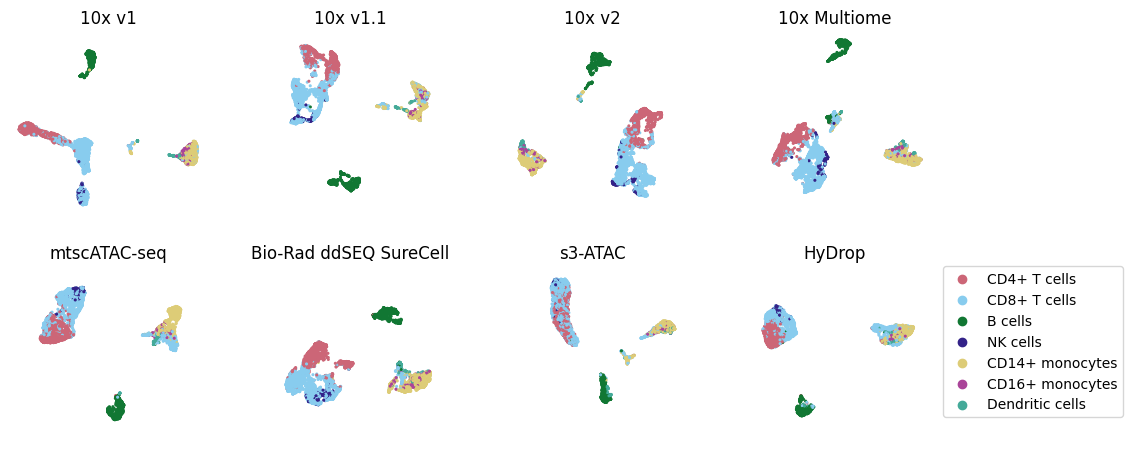

In [36]:
fig, axes = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(10, 5))
fig.tight_layout()
axes = axes.flatten()
for sample, path in cell_data_path_dict.items():
    print(sample)
    tech = sample.split("_")[0]
    df = pd.read_csv(path, index_col=0)
    df["harmony_consensus_cell_type__mega"] = [
        x.replace(" ", "_") for x in df["harmony_consensus_cell_type__mega"]
    ]
    df = df.sample(
        frac=1
    )  # shuffle rows so that no cell type is biased to be displayed above another one

    ax = axes[tech_order.index(tech)]
    legend_bool = tech == tech_order[-1]
    sns.scatterplot(
        data=df,
        x="UMAP_1",
        y="UMAP_2",
        hue="harmony_consensus_cell_type__mega",
        s=5,
        linewidth=0,
        ax=ax,
        legend=legend_bool,
        palette=cell_type_color_dict,
    )

    if legend_bool:
        handles, labels = ax.get_legend_handles_labels()
        l = plt.legend(
            handles[0 : len(tech_order)],
            [cell_type_alias_dict[x] for x in labels[0 : len(cell_type_order)]],
            bbox_to_anchor=(1.05, 1),
            loc=2,
            borderaxespad=0.0,
        )
    # ax.get_legend().remove()
    # ax.set(adjustable="box", aspect="equal")
    ax.set_aspect("equal")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.title.set_text(tech_alias_dict[tech])
    sns.despine(left=True, bottom=True)

plt.savefig(
    "plts_final/UMAP_all.png",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)
plt.savefig(
    "plts_final/UMAP_all.svg",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)

In [44]:
cell_type_order

['B_cell',
 'CD14+_monocyte',
 'CD4+_T_cell',
 'Cytotoxic_T_cell',
 'Dendritic_cell',
 'Natural_killer_cell',
 'CD16+_monocyte']

In [42]:
for sample, path in cell_data_path_dict.items():
    print(sample)
    tech = sample.split("_")[0]
    df = pd.read_csv(path, index_col=0)

    print(df["harmony_consensus_cell_type__mega"].value_counts())

10xmultiome_celltypefair_1.FIXEDCELLS
Cytotoxic T cell       1769
CD4+ T cell            1008
CD14+ monocyte          747
B cell                  555
CD16+ monocyte          144
Natural killer cell     126
Dendritic cell           83
Name: harmony_consensus_cell_type__mega, dtype: int64
10xv11_celltypefair_1.FIXEDCELLS
Cytotoxic T cell       1769
CD4+ T cell            1008
CD14+ monocyte          747
B cell                  555
CD16+ monocyte          144
Natural killer cell     126
Dendritic cell           83
Name: harmony_consensus_cell_type__mega, dtype: int64
10xv1_celltypefair_1.FIXEDCELLS
Cytotoxic T cell       1769
CD4+ T cell            1008
CD14+ monocyte          747
B cell                  555
CD16+ monocyte          144
Natural killer cell     126
Dendritic cell           83
Name: harmony_consensus_cell_type__mega, dtype: int64
10xv2_celltypefair_1.FIXEDCELLS
Cytotoxic T cell       1769
CD4+ T cell            1008
CD14+ monocyte          747
B cell                  555
CD1